# Smooth Curve through Rough Data

A quick and easy way to get started in gathering data for indoor model research is to come up with a way to regenerate data presented in my two favorite sources: INAV and the NFFS Symposiums. Both of these publications are available in PDF form online.

The technique I used to get data is a bit crude, but with a little help from Python, it works fairly well. 

## Digitizing Graphs

*Python* and *Jupyter* are very popular in the *data science* world, where analyzing aw data to generate scientific results is a big part of the work done. Fortunately, there are many supporting libraries in the *Python* world to make this work easy and quick. Let's explore a technique I use to gather data for my research into the aerodynamics of indoor models.

Here is the basic process.

- 1. Using a screen capture program like *Snagit*, capture a **PNG** image of the graph 
- 2. Import that image into *Inkscape* and zoom it to full screen size
- 3. Move the mouse to the four corners of the plot, record the screen coordinates
- 4. Record the graph values at each corner point.
- 5. Move the cursor to selected points on the curve line, record screen coordinates
- 6. Use Python to scale screen points to produce digitized curve data.
- . Plot with *matplotlib

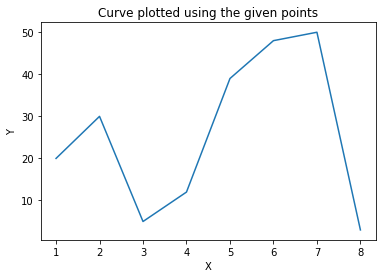

In [2]:
import numpy as np
import matplotlib.pyplot as plt
 
# Dataset
x = np.array([ 1,  2,  3,  4,  5,  6,  7, 8 ])
y = np.array([ 20, 30, 5, 12, 39, 48, 50, 3 ])
 
# Plotting the Graph
plt.plot(x, y)
plt.title("Curve plotted using the given points")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

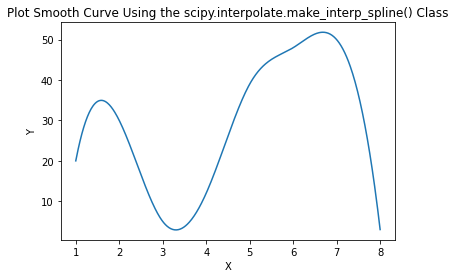

In [3]:
from scipy.interpolate import make_interp_spline
 
X_Y_Spline = make_interp_spline(x, y)
 
# Returns evenly spaced numbers
# over a specified interval.
X_ = np.linspace(x.min(), x.max(), 500)
Y_ = X_Y_Spline(X_)
 
# Plotting the Graph
plt.plot(X_, Y_)
plt.title("Plot Smooth Curve Using the scipy.interpolate.make_interp_spline() Class")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

The smooth curve is produced using a *spline* function that was developed many years ago to model the plastic spline used by ancient draftsmen to draw smooth curves for ships. The thing strip of plastic was positioned alone a small number of fixed points, and the line was drawn along the plastic strip. 

Unfortunately, the smoothness of the line we get with Python depends on the data set we use. As you see above, there might be a problem with one of our data points near an **X** value of **6**. We can tweak that data point to get a better value, but we are guessing a bit on what that b=value should be.

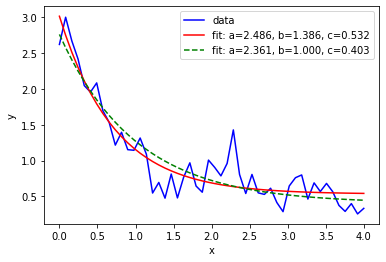

In [6]:
from scipy.optimize import curve_fit
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

xdata = np.linspace(0, 4, 50)
y = func(xdata, 2.5, 1.3, 0.5)
rng = np.random.default_rng()
y_noise = 0.2 * rng.normal(size=xdata.size)
ydata = y + y_noise
plt.plot(xdata, ydata, 'b-', label='data')
popt, pcov = curve_fit(func, xdata, ydata)
plt.plot(xdata, func(xdata, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
popt, pcov = curve_fit(func, xdata, ydata, bounds=(0, [3., 1., 0.5]))
plt.plot(xdata, func(xdata, *popt), 'g--',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()